In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {0}, x_test.shape : {1}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {0}, t_test.shape : {1}'.format(t_train.shape, t_test.shape))


x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1),
                kernel_size=3, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model.add(Conv2D(kernel_size=3, filters=64,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model.add(Conv2D(kernel_size=3, filters=128,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 128)       

In [ ]:
hist = model.fit(x_train.reshape(-1,28,28,1), t_train,
                 batch_size=50, epochs=50, validation_data=(x_test.reshape(-1,28,28,1), t_test))

Epoch 1/50
1200/1200 [==============================] - 17s 4ms/step - loss: 0.1471 - accuracy: 0.9547 - val_loss: 0.0374 - val_accuracy: 0.9874
Epoch 2/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0339 - val_accuracy: 0.9892
Epoch 3/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0307 - val_accuracy: 0.9903
Epoch 4/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0222 - val_accuracy: 0.9929
Epoch 5/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0351 - val_accuracy: 0.9890
Epoch 6/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0340 - val_accuracy: 0.9909
Epoch 7/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0241 - val_accuracy

In [ ]:
model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0620 - accuracy: 0.9943


[0.06204335391521454, 0.9943000078201294]

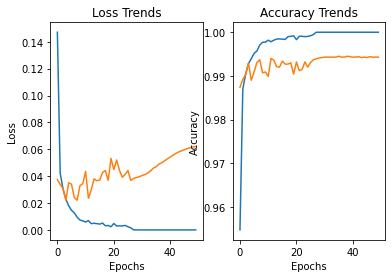

In [ ]:
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trends')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
ret_val = model.predict(x_test.reshape(-1,28,28,1))

print(f'ret_val.type : {type(ret_val)}, ret_val.shape : {ret_val.shape}')

predicted_val = np.argmax(ret_val,axis=1)

predicted_comp_list = np.equal(predicted_val, t_test)

index_label_prediction = [ [index, t_test[index], predicted_val[index]] for index, result in enumerate(predicted_comp_list) if result == False ]

print(len(index_label_prediction))



ret_val.type : <class 'numpy.ndarray'>, ret_val.shape : (10000, 10)
57


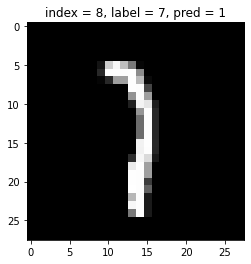

In [ ]:
false_data_index = np.random.randint(len(index_label_prediction))

mnist_index = index_label_prediction[false_data_index][0]
label = index_label_prediction[false_data_index][1]
prediction = index_label_prediction[false_data_index][2]

title_str = f'index = {false_data_index}, label = {label}, pred = {prediction}'

img = x_test[mnist_index].reshape(28,28)

plt.title(title_str)
plt.imshow(img,cmap='gray')
plt.show()